In [25]:
from matplotlib import pyplot as pl
from scipy.sparse import coo_matrix
import numpy as np
%matplotlib inline

In [26]:
#parametter
L = 1.0
nx = 51
dx = L / (nx-1)
x = np.linspace(0.0, L, num=nx)

alpha = 1.22e-3
q = 0.0

T0 = np.zeros(nx)
T0[0] = 100.0

In [31]:
def btcs(u0, nt, dt, dx, alpha, q = 0.0):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    A = lhs_operator(u0.size-2, sigma)
    for n in range(nt):
        b = rhs_vector(u, sigma, q * dx)
        u[1:-1] = np.linalg.solve(A,b)
        
        u[0] = u0[0]
        u[-1] = u[-2] + q * dx
    return u

In [44]:
def lhs_operator(N, sigma):
    #D
    row1 = list(range(N))
    col1 = list(range(N))
    data1 = np.ones(N)*((2 + 1 / sigma))
    D = coo_matrix((data1, (row1, col1)), shape = (N,N)).toarray()
    D[-1,-1] = 1 + 1/sigma

    #U
    row2 = list(range(N-1))
    col2 = list(range(N-1)) + np.ones(N-1)
    data2 = np.ones(N-1) * (-1)
    U = coo_matrix((data2, (row2, col2)), shape = (N,N)).toarray()
    
    #L
    row3 = list(range(N-1)) + np.ones(N-1)
    col3 = list(range(N-1))
    data3 = np.ones(N-1) * (-1)
    L = coo_matrix((data3, (row3, col3)), shape = (N,N)).toarray()
    
    A = D + U + L
    print(A)
    return A

In [45]:
def rhs_vector(T, sigma, qdx):
    b = T[1:-1] / sigma
    b[0] = b[0] + T[0]
    b[-1] = b[-1] + qdx
    return b   

[[ 2.2 -1.   0.  ...  0.   0.   0. ]
 [-1.   2.2 -1.  ...  0.   0.   0. ]
 [ 0.  -1.   2.2 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.2 -1.   0. ]
 [ 0.   0.   0.  ... -1.   2.2 -1. ]
 [ 0.   0.   0.  ...  0.  -1.   1.2]]


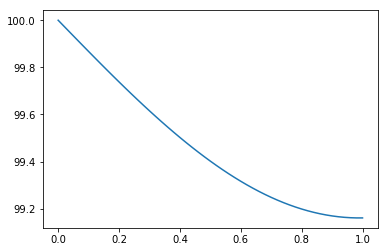

In [47]:
nt = 1000
sigma = 5
dt = sigma * dx**2 / alpha

T = btcs(T0, nt, dt, dx, alpha, q = 0.0)

pl.plot(x, T)